# Face & Eye Detection using HAAR Cascade Classifiers

### Face detection on images

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

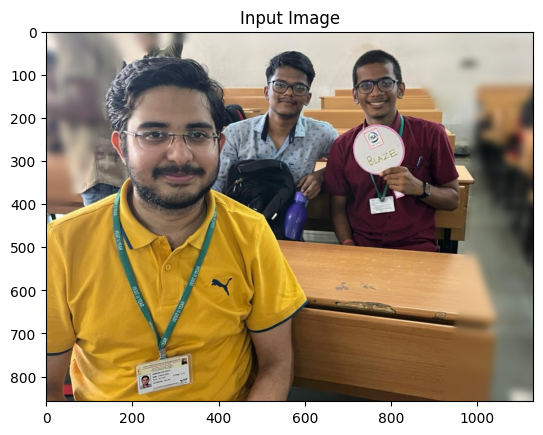

In [4]:
# Load our image then convert it to grayscale
image = cv2.imread('C:/Users/nachi/Desktop/test projects/opencv projects/face/test_imgs/blaze.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# convert from bgr to rgb for matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.title('Input Image')
plt.show()

#### Tuning Cascade Classifiers

*ourClassifier*.**detectMultiScale**(input image, **Scale Factor** , **Min Neighbors**)

- **Scale Factor**
Specifies how much we reduce the image size each time we scale. E.g. in face detection we typically use 1.3. This means we reduce the image by 30% each time it’s scaled. Smaller values, like 1.05 will take longer to compute, but will increase the rate of detection.



- **Min Neighbors**
Specifies the number of neighbors each potential window should have in order to consider it a positive detection. Typically set between 3-6. 
It acts as sensitivity setting, low values will sometimes detect multiples faces over a single face. High values will ensure less false positives, but you may miss some faces.  


<>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\nachi\AppData\Local\Temp\ipykernel_7800\3840879579.py:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


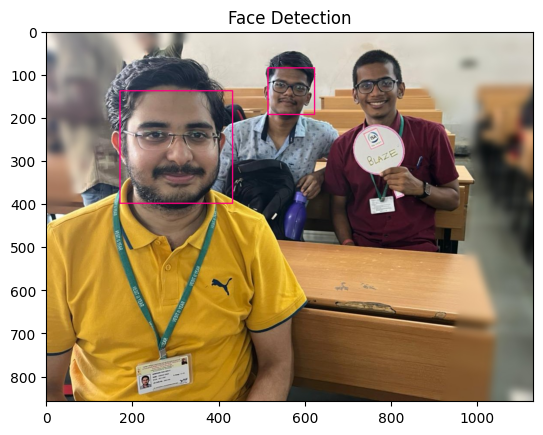

In [5]:
# We point OpenCV's CascadeClassifier function to where our 
# classifier (XML file format) is stored
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Our classifier returns the ROI of the detected face as a tuple
# It stores the top left coordinate and the top right coordiantes
faces = face_classifier.detectMultiScale(gray, 1.3, 5)
# print(faces)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No faces found")

# We iterate through our faces array and draw a rectangle
# over each face in faces
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Face Detection')
plt.show()
    # how to show all in one image

### Combining face and eye detection

In [36]:
eye_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\nachi\AppData\Local\Temp\ipykernel_11520\3472799355.py:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


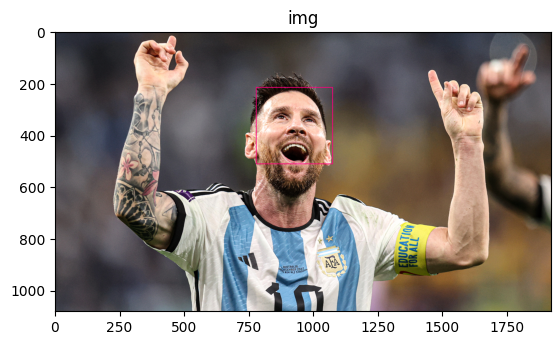

[[ 60  80  71  71]
 [169  93  61  61]]


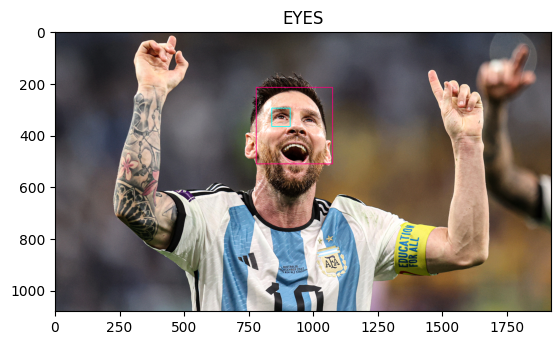

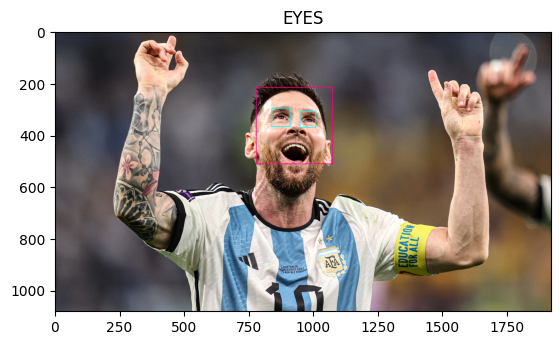

In [51]:

img = cv2.imread('C:/Users/nachi/Desktop/test projects/opencv projects/face/test_imgs/t2.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)
# print (faces)
# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('img')
    plt.show()
    
    
    # Reducing the region of interest by trimming list
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
    print(eyes)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('EYES')
        plt.show()


### **Live face & eye detection**

#### Capturing camera ()

In [56]:
# make with them
cap = cv2.VideoCapture(0)
while 1:
    # reads frames from a camera
    ret, img = cap.read()
    cv2.imshow('img', img)

    # Wait till Esc key pressed to stop
    k = cv2.waitKey(30)
    if k == 81:
        break

# Close the window
cap.release()

# De-allocate any associated memory usage
cv2.destroyAllWindows()



#### Integrating with face & eye detection 

In [57]:
# comment niche ke chize n explain one one line
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# capture frames from a camera
cap = cv2.VideoCapture(0)

# loop runs if capturing has been initialized.
while 1:

    # reads frames from a camera
    ret, img = cap.read()

    # convert to gray scale of each frames
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detects faces of different sizes in the input image
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    
    for (x, y, w, h) in faces:
        # To draw a rectangle in a face
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 0), 2)

        # Reducing the region of interest
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]

        # Detects eyes of different sizes in the input image
        eyes = eye_classifier.detectMultiScale(roi_gray, 1.3, 5)

        # To draw a rectangle in eyes
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey),
                          (ex+ew, ey+eh), (0, 127, 255), 2)

    # Display an image in a window
    cv2.imshow('img', img)

    # Wait till Esc key pressed to stop
    k = cv2.waitKey(30)
    if k == 27:
    # quit with a character key
        break

# Close the window
cap.release()

# De-allocate any associated memory usage
cv2.destroyAllWindows()
